# Installation
First, let's install PyTorch and related libraries

# Import Libraries

In [ ]:
import torch
from torch import nn
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet18
from torchvision.models import ResNet18_Weights


# Set device to GPU if available, otherwise use CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Initialize model with pre-trained weights
resnet18_model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
# Move model to the appropriate device
resnet18_model = resnet18_model.to(device)
device

Using device: cpu


'cpu'

In [2]:
# Display model architecture
resnet18_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Data Transforms
## Convert data to tensor and Data augmentation

In [3]:
# Define transforms for training with data augmentation
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    
   
]) 

# Define transforms fortesting
eval_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    
]) 




# Load Data

In [ ]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from PIL import Image

train_data = datasets.ImageFolder(root="D:/graduation project depi/data/train",
                                  transform=train_transform, 
                                  target_transform=None) 

test_data = datasets.ImageFolder(root="D:/graduation project depi/data/test",
                                 transform=eval_transform)

validation_data = datasets.ImageFolder(root="D:/graduation project depi/data/valid",
                                 transform=eval_transform)
train_data, test_data, validation_data


c:\Users\ELZAHBIA\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(Dataset ImageFolder
     Number of datapoints: 613
     Root location: D:/graduation project depi/data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 315
     Root location: D:/graduation project depi/data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 72
     Root location: D:/graduation project depi/data/valid
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
 

In [5]:
# Check a random sample from the dataset
train_data[np.random.randint(0, len(train_data))]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

In [6]:
len(train_data), len(test_data), len(validation_data)

(613, 315, 72)

In [7]:
# Get class names
class_names = train_data.classes
class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [8]:
# Get class to index mapping
class_dict = train_data.class_to_idx
class_dict

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [9]:
# Clean up class names to make them more readable
old_key1 = 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
new_key1 = 'adenocarcinoma_left.lower.lobe'

old_key2 = 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
new_key2 = 'large.cell.carcinoma_left.hilum'

old_key3 = 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
new_key3 = 'squamous.cell.carcinoma_left.hilum'

# Update the keys in class_dict
if old_key1 in class_dict:
    class_dict[new_key1] = class_dict[old_key1]
    del class_dict[old_key1]

if old_key2 in class_dict:
    class_dict[new_key2] = class_dict[old_key2]
    del class_dict[old_key2]

if old_key3 in class_dict:
    class_dict[new_key3] = class_dict[old_key3]
    del class_dict[old_key3]

print(class_dict)

{'normal': 2, 'adenocarcinoma_left.lower.lobe': 0, 'large.cell.carcinoma_left.hilum': 1, 'squamous.cell.carcinoma_left.hilum': 3}


In [10]:
# Update class names
for i, name in enumerate(class_names):
    if name == old_key1:
        class_names[i] = new_key1
    elif name == old_key2:
        class_names[i] = new_key2
    elif name == old_key3:
        class_names[i] = new_key3

class_names

['adenocarcinoma_left.lower.lobe',
 'large.cell.carcinoma_left.hilum',
 'normal',
 'squamous.cell.carcinoma_left.hilum']

In [11]:
# Display a random image tensor and its metadata
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]

print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
print(f"Class name: {class_names[label]}")

Image shape: torch.Size([3, 224, 224])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>
Class name: adenocarcinoma_left.lower.lobe


# Visualize Data

Image permute: torch.Size([224, 224, 3]) 


Text(0.5, 1.0, 'normal')

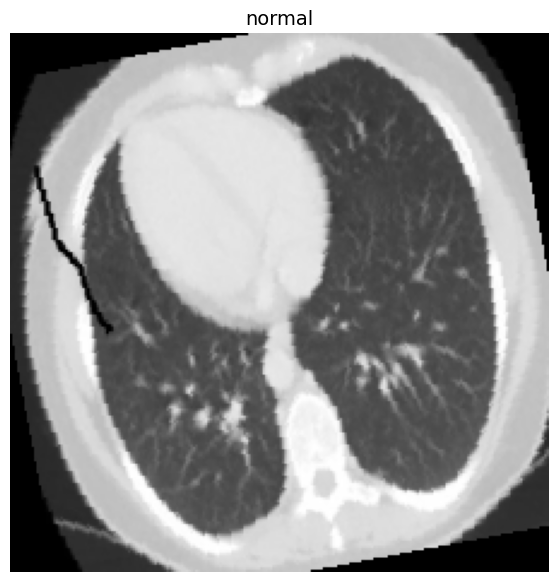

In [12]:
# Function to denormalize image for visualization
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]

# convert the image tensor to numpy array  
#  Channels, Height, Width (PyTorch default) => Height, Width, Channels (matplotlib  default)
img_permute = img.permute(1, 2, 0)
print(f"Image permute: {img_permute.shape} ")
plt.figure(figsize=(12, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [13]:
# Create data loaders
#  It allows your model to efficiently load batches of data during training and evaluation.
#  It helps in shuffling the data Randomizes the order of data each epoch → improves generalization
#  loading it in parallel using multiple workers,
#  and controlling the batch size.
#
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True,
                             )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False,
                             )

val_dataloader = DataLoader(dataset=validation_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False,
                             )

print(f"Number of batches in train dataloader: {len(train_dataloader)}")
print(f"Number of batches in test dataloader: {len(test_dataloader)}")
print(f"Number of batches in validation dataloader: {len(val_dataloader)}")

Number of batches in train dataloader: 20
Number of batches in test dataloader: 10
Number of batches in validation dataloader: 3


# Build Model

In [14]:
# Modify the final fully connected layer for our classification task
resnet18_model.fc = nn.Sequential(
      nn.Linear(512,512),
    nn.Dropout(0.2),
     nn.Linear(512,256),
    nn.Linear(256,len(class_names)), 
)


resnet18_model.fc

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): Linear(in_features=256, out_features=4, bias=True)
)

In [15]:
# move the whole model to device (GPU or CPU)
resnet18_model = resnet18_model.to(device)

In [16]:
# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# choose optimizer sgd not adam cause its better on genrlization 
#optimizer updates the model's weights to minimize that loss.
# lr=0.01 (Learning Rate) controls how big a step the optimizer takes when updating the model’s weights.
# momentum=0.9 to improve the speed and efficiency of gradient descent

optimizer = torch.optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9)


In [17]:
from torchinfo import summary
summary(resnet18_model, input_size=[1, 3, 64, 64])


Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 4]                    --
├─Conv2d: 1-1                            [1, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─Sequential: 1-5                        [1, 64, 16, 16]           --
│    └─BasicBlock: 2-1                   [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-1                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-3                    [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-4                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-6                    [1, 64, 16, 16]           --
│

# Training Functions

In [18]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    model.train()

    train_loss, train_acc = 0, 0
    
    # Create progress bar that tracks progress over the dataloader batches.
    progress_bar = tqdm(dataloader, desc="Training", leave=False)
# Iterates through each batch of images X and their corresponding labels y.
    for batch, (X, y) in enumerate(dataloader):
        # Move data to the appropriate device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Backward pass and optimization
        #Clears old gradients.
        optimizer.zero_grad()
        # Computes the gradients of the loss with respect to the model parameters.
        loss.backward()
        # Updates weights using the optimizer.
        optimizer.step()

        # Calculate accuracy
        # Applies softmax to get probabilities.
        y_pred_class = y_pred.argmax(dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
        
        # Update progress bar
        progress_bar.set_postfix(loss=loss.item(), acc=(y_pred_class == y).sum().item() / len(y_pred))

    # Calculate averages
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [19]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    model.eval()

    test_loss, test_acc = 0, 0
  

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            # Move data to the appropriate device
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))
            
            # Store predictions and true labels for confusion matrix
        
    # Calculate averages
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc, 

In [20]:
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          val_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
    
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": [],
               "val_loss": [],
               "val_acc": [],
               }
    
    # Track best validation accuracy
    best_val_acc = 0.0
    # Track best test accuracy epoch is the number of times the model will be trained on the entire dataset.
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        
        # Training
        train_loss, train_acc = train_step(model=model,
                                         dataloader=train_dataloader,
                                         loss_fn=loss_fn,
                                         optimizer=optimizer,
                                         device=device)
        # testing
        test_loss, test_acc, = test_step(model=model,
                                           dataloader=test_dataloader,
                                           loss_fn=loss_fn,
                                           device=device)
        
        # Validation
        val_loss, val_acc, = test_step(model=model,
                                         dataloader=val_dataloader,
                                         loss_fn=loss_fn,
                                         device=device)
        
         
      
        
      
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")
            print(f"New best model saved with validation accuracy: {best_val_acc:.4f}")
        
       
        
        print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}")
        print(f"Val loss: {val_loss:.4f} | Val acc: {val_acc:.4f}")
        print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
        print("-" * 50)

        # Store results
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["val_loss"].append(val_loss)
        results["val_acc"].append(val_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    
    
    print(f"Loaded best model with validation accuracy: {best_val_acc:.4f}")
    print("Model and class names saved successfully.")
    
    return results

In [ ]:

# Set number of epochs
NUM_EPOCHS = 2

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train the model
model_results = train(model=resnet18_model,
                                    train_dataloader=train_dataloader,
                                    test_dataloader=test_dataloader,
                                    val_dataloader=val_dataloader,
                                    optimizer=optimizer,
                                    loss_fn=loss_fn,
                                    epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch 1/2


New best model saved with validation accuracy: 0.2500
Train loss: 1.0792 | Train acc: 0.5175
Val loss: 1.8626 | Val acc: 0.2500
Test loss: 1.6701 | Test acc: 0.3812
--------------------------------------------------
Epoch 2/2


New best model saved with validation accuracy: 0.5938
Train loss: 0.6496 | Train acc: 0.7203
Val loss: 0.8873 | Val acc: 0.5938
Test loss: 0.7739 | Test acc: 0.6711
--------------------------------------------------
Loaded best model with validation accuracy: 0.5938
Model and class names saved successfully.
Total training time: 82.881 seconds


# Visualize Training Results   

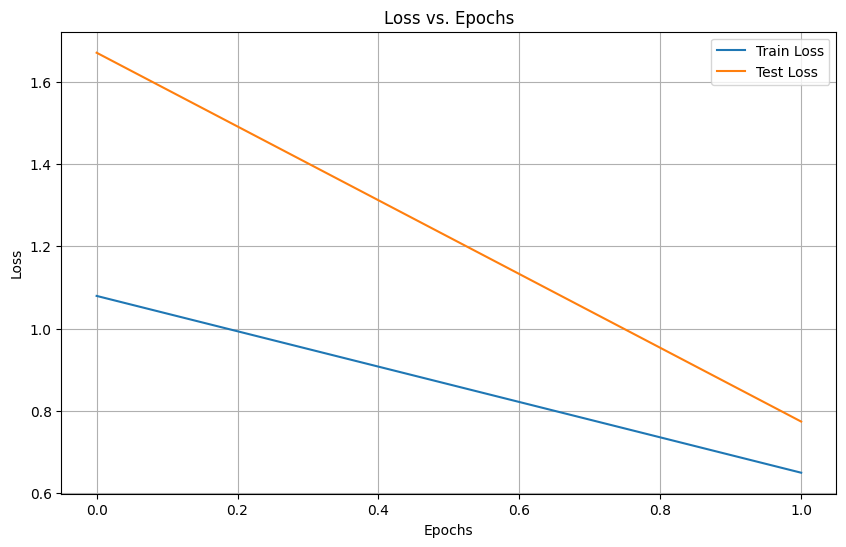

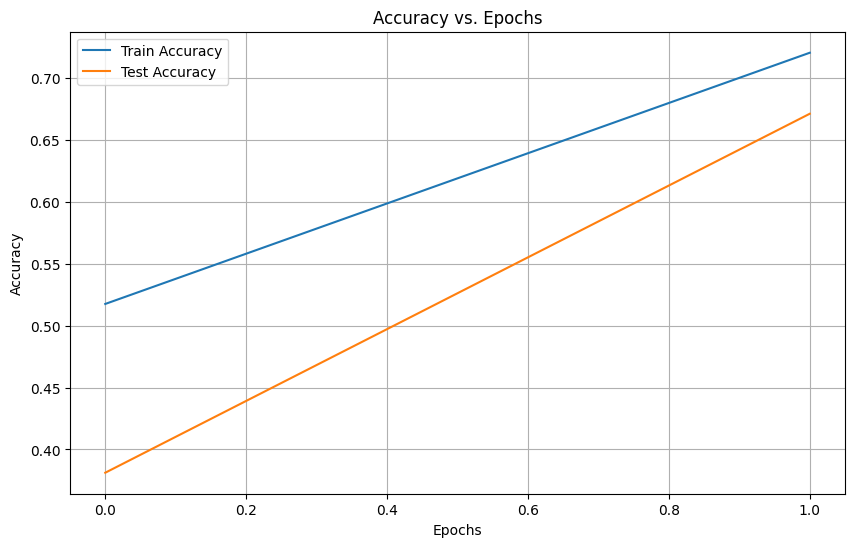

In [22]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(model_results["train_loss"], label="Train Loss")
plt.plot(model_results["test_loss"], label="Test Loss")
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(model_results["train_acc"], label="Train Accuracy")
plt.plot(model_results["test_acc"], label="Test Accuracy")
plt.title("Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Saving Model

In [23]:
# Load the saved weights
resnet18_model.load_state_dict(torch.load("best_model.pth"))
resnet18_model.to(device)
resnet18_model.eval()



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:


    
def predict_image(image_path, model, transform, class_names, device=device):
    """Predict class for a single image"""
    # Open and preprocess the image
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    # Make prediction
    with torch.inference_mode():
        outputs = model(image_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        confidence, predicted_idx = torch.max(probabilities, dim=1)
        predicted_class = class_names[predicted_idx.item()]
        confidence = confidence.item()
    
    # Return results
    return {
        'class': predicted_class,
        'confidence': confidence,
        'probabilities': probabilities.cpu().squeeze().tolist(),
        'class_names': class_names
    }


Using sample image from class: squamous.cell.carcinoma_left.hilum
Predicted Class: adenocarcinoma_left.lower.lobe
Confidence: 0.6557


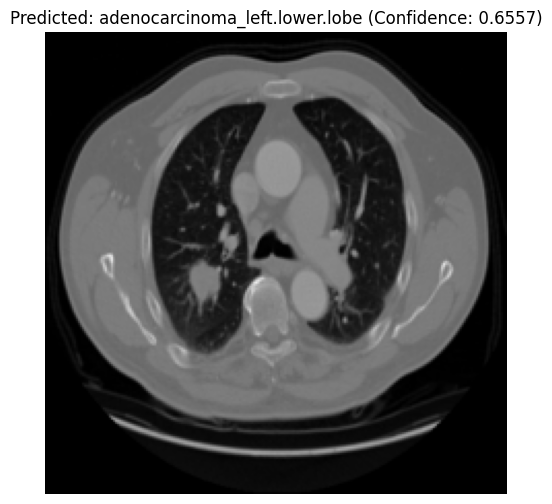

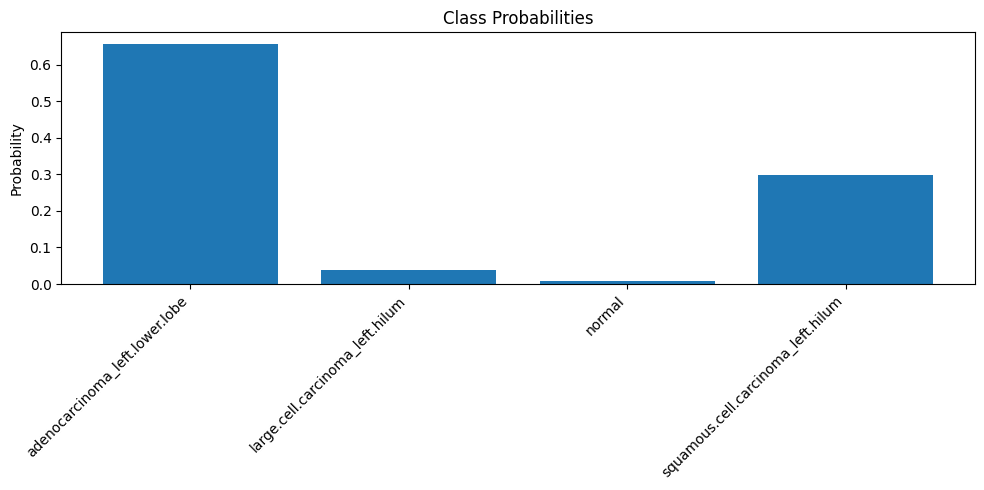

In [ ]:
# Example usage
# Use a sample image from your test dataset
random_idx = torch.randint(0, len(test_data), size=(1,)).item()
img_tensor, label = test_data[random_idx]
img_class = class_names[label]

# Create a temporary file path for the example
import tempfile
import os
from torchvision.utils import save_image

# Create a temporary directory
temp_dir = tempfile.mkdtemp()
image_path = os.path.join(temp_dir, f"sample_{img_class}.png")

print(f"Using sample image from class: {img_class}")
result = predict_image(
    image_path=image_path, 
    model=resnet18_model, 
    transform=eval_transform,  
    class_names=class_names,
    device=device
)
# Display results
print(f"Predicted Class: {result['class']}")
print(f"Confidence: {result['confidence']:.4f}")

# Display the image with prediction
img = Image.open(image_path).convert("RGB")
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title(f"Predicted: {result['class']} (Confidence: {result['confidence']:.4f})")
plt.axis('off')
plt.show()

# Display probability distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, result['probabilities'])
plt.title('Class Probabilities')
plt.ylabel('Probability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()